## Heart Problem  Dataset - Decision Tree 

# Decision Tree:
   It is a supervised machine learning technique. It is used to predict the accuracy of dependent variable when target is categorical mailnly more than 2.We use gini and entropy to find the impure measure based on that we ll select root node. To best model we use hyperparameter tuning optimizer

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mydata = pd.read_csv("HeartDisease.csv") # load the dataset

In [4]:
mydata.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
mydata.info() # check the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
mydata.describe() # measure of central tendenency

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
mydata.isnull().sum() # to check null values

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [9]:
mydata_corr = mydata.corr() # To find correlation between variables.
mydata_corr

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


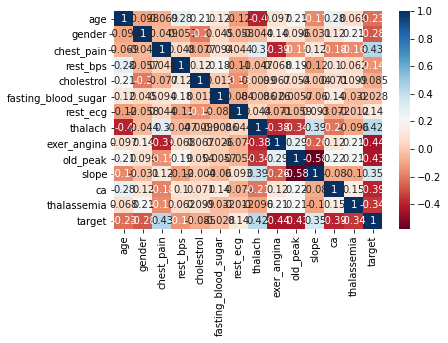

In [13]:
sns.heatmap(mydata_corr,annot = True, cmap = "RdBu")

##### Separate independent and dependent variable

In [18]:
y_dep = mydata["target"]
y_dep

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
x_ind = mydata.drop('target', axis = 1)

#### Model Building

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,train_size = 0.8, random_state = 2)

In [23]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
confusion_matrix(y_test,y_pred)

array([[22, 10],
       [ 1, 28]])

In [29]:
accuracy_score(y_test,y_pred)

0.819672131147541

#### The accuracy score by default gini is 81 %.

[Text(167.4, 190.26, 'X[2] <= 0.5\ngini = 0.492\nsamples = 242\nvalue = [106, 136]'),
 Text(83.7, 135.9, 'X[11] <= 0.5\ngini = 0.426\nsamples = 114\nvalue = [79, 35]'),
 Text(41.85, 81.53999999999999, 'X[12] <= 2.5\ngini = 0.488\nsamples = 52\nvalue = [22, 30]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 0.45\ngini = 0.148\nsamples = 62\nvalue = [57, 5]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[10] <= 1.5\ngini = 0.333\nsamples = 128\nvalue = [27, 101]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.473\nsamples = 52\nvalue = [20, 32]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[3] <= 182.0\ngini = 0.167\nsamples = 76\nvalue = [7, 69]'),
 

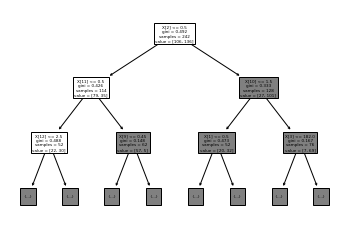

In [30]:
tree.plot_tree(model,max_depth= 2)


In [31]:
import graphviz
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import IPython
from IPython.display import Image
import pydotplus

In [32]:
my_graph = StringIO()

In [33]:
export_graphviz(model,out_file = my_graph, filled = True)

In [34]:
graph = pydotplus.graph_from_dot_data(my_graph.getvalue())

In [35]:
graph.write_jpg("DecisionTree.jpg")

True

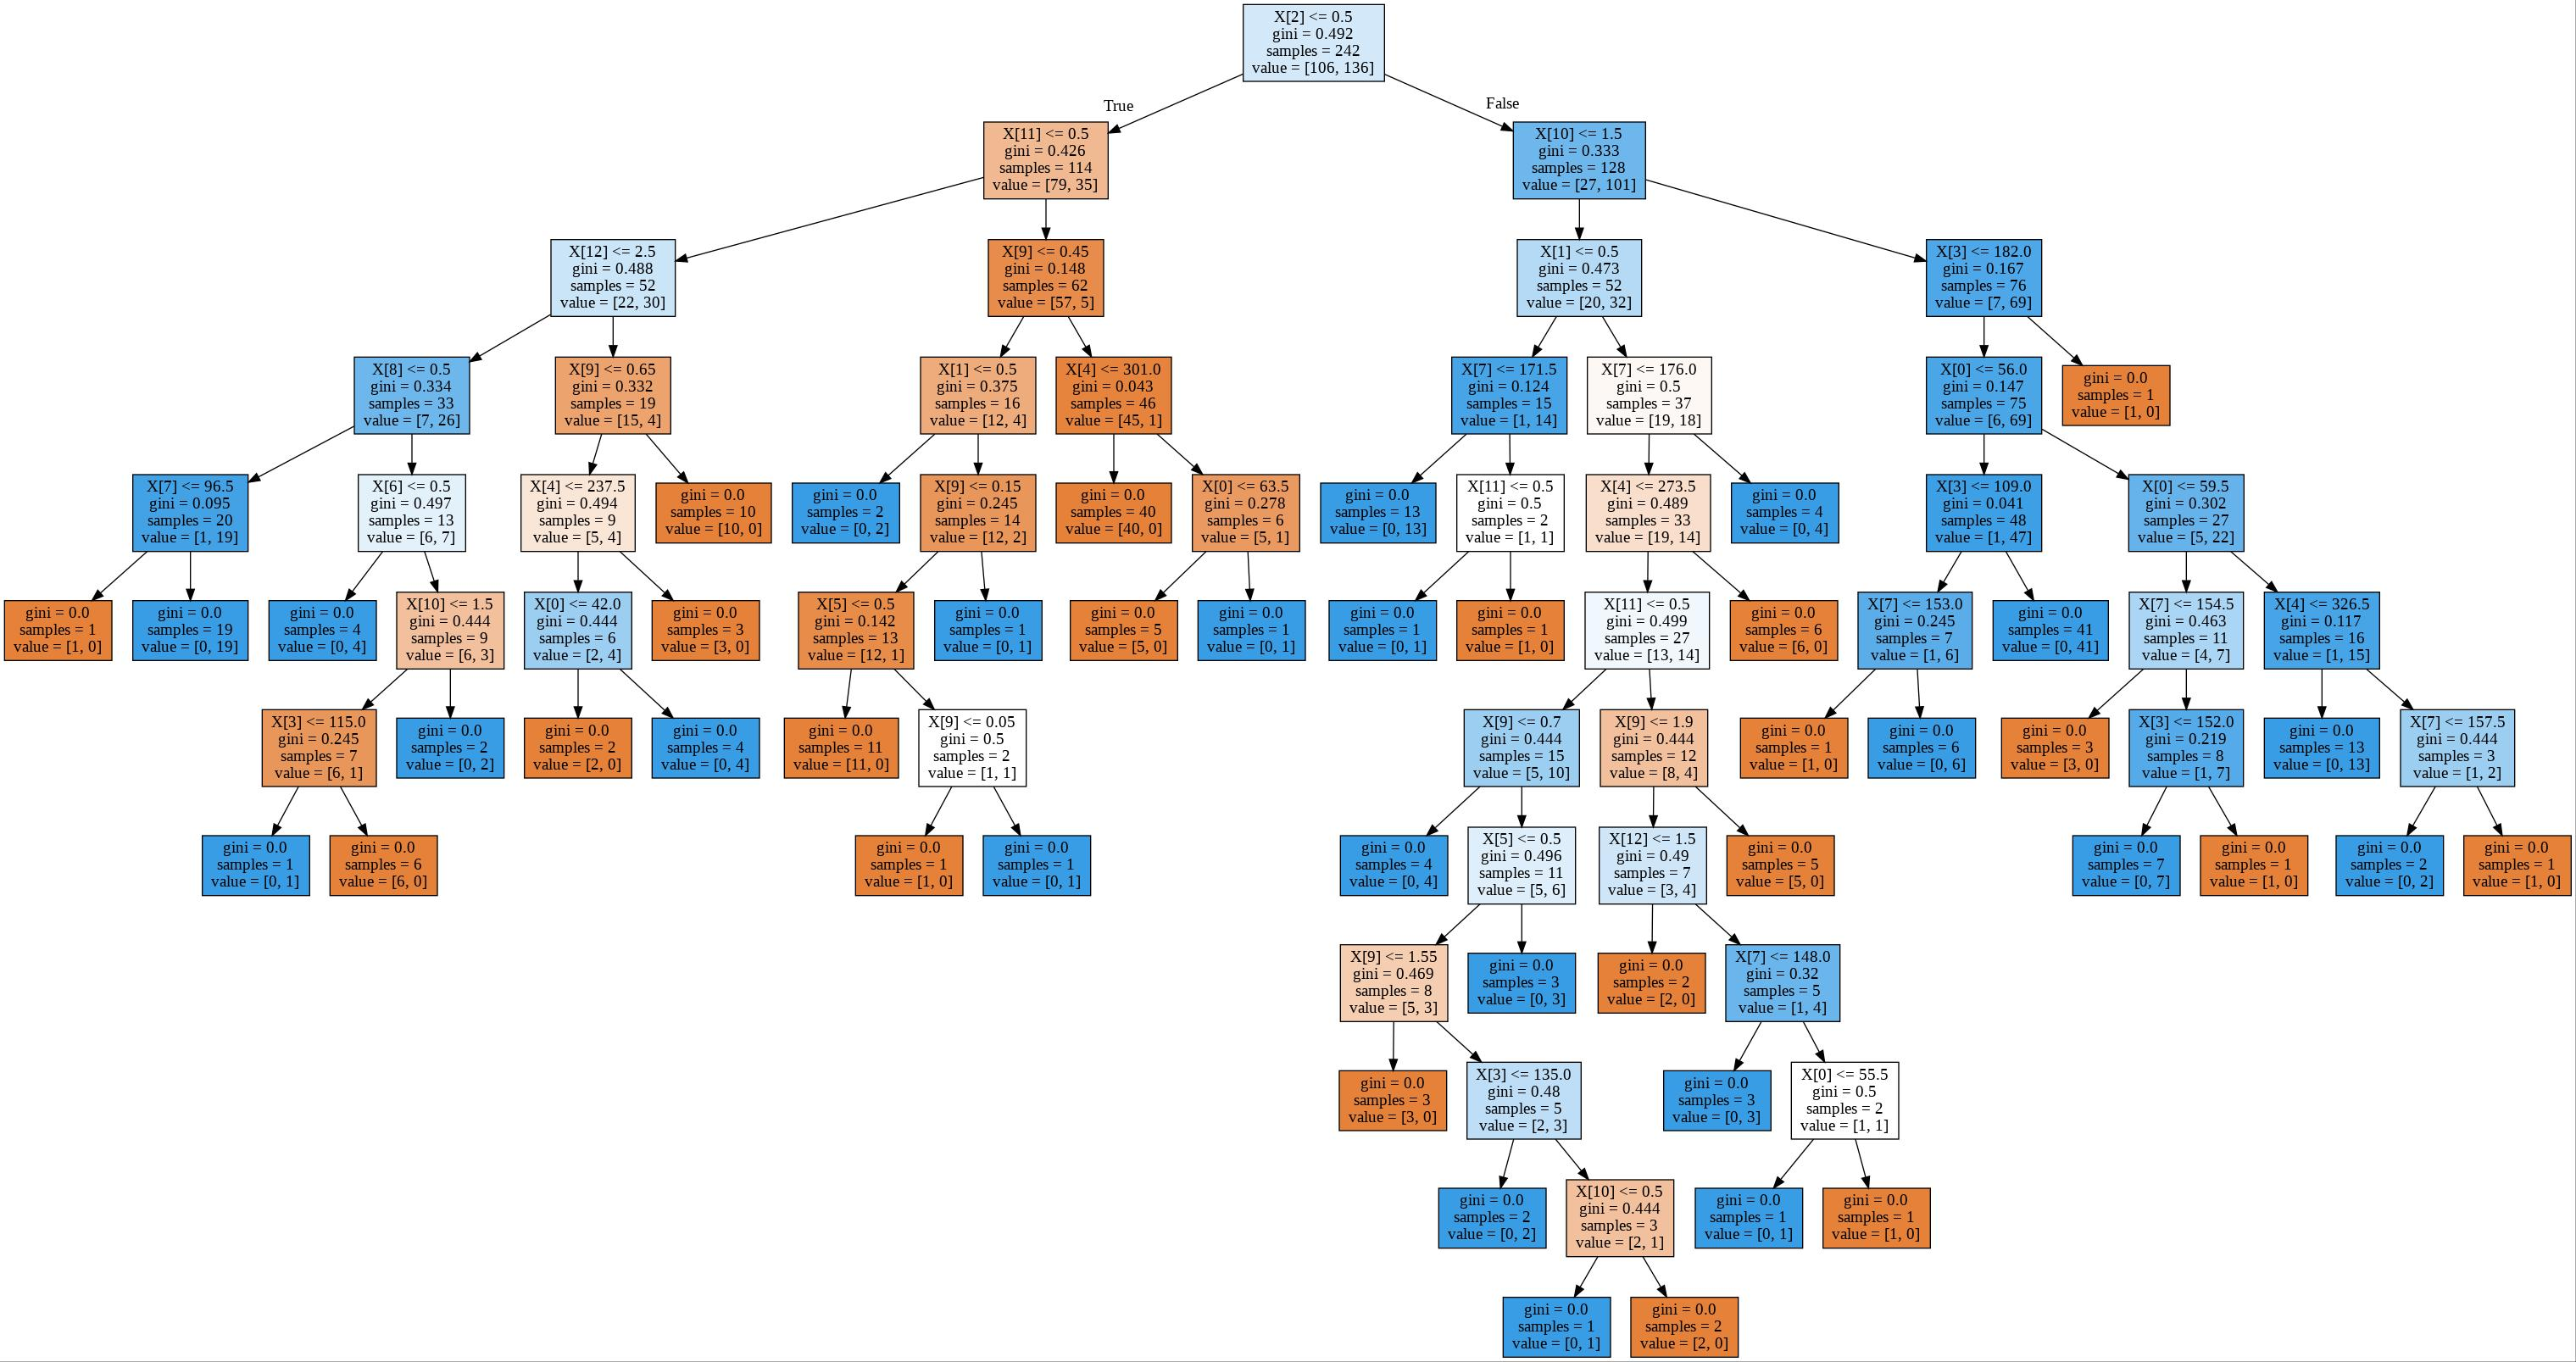

In [37]:
Image(graph.create_jpg())

In [44]:
from sklearn import tree
model_e = tree.DecisionTreeClassifier(criterion= 'entropy')

In [45]:
model_e.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
y_pred = model_e.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [47]:
confusion_matrix(y_test,y_pred)

array([[23,  9],
       [ 2, 27]])

In [48]:
accuracy_score(y_test,y_pred)

0.819672131147541

#### The accuracy based on entropy is 81%

#### Hyper parameter Tuning:

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
parameters = {'max_depth':(10,20,30,40,50,60,70,80,90,100),'criterion':('gini','entropy'),
              'max_features':('sqrt','log2','auto'),'min_samples_split':(2,4,6)}

In [51]:
DT=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=5)

In [52]:
DT.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [53]:
DT.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
model_after_Ht=tree.DecisionTreeClassifier(criterion='entropy', max_depth=60, max_features='sqrt')

In [55]:
model_after_Ht=model_after_Ht.fit(x_train,y_train)

In [56]:
y_pred_after_hp=model_after_Ht.predict(x_test)

In [57]:
confusion_matrix(y_test,y_pred_after_hp)

array([[21, 11],
       [ 2, 27]])

In [58]:
accuracy_score(y_test,y_pred_after_hp)

0.7868852459016393

## Conclusion
  The optimizer found that the best model for this dataset is entropy. Even both model gave us accuracy more than 70% the hyper parameter tuning gave the entropy as best estimator, because even in more dataa values the entropy accuracy will be maintained constant. So the overall accuracy is 79%. Thus we improved our model accuracy using Decision Tree.